In [1]:
import pandas as pd 
import numpy as np 
import seaborn as sns 
import matplotlib.pyplot as plt 


In [2]:
#read file 
df = pd.read_csv('products.csv')
df.head(5)

,title,url,img_url,price,category,sub_category,brand,description,star,star_reviewers,sold
0,Nồi áp suất Elmich PCE-1805 dung tích 2.5L - H...,https://tka.tiki.vn/pixel/pixel?data=o1-ozAXsq...,https://salt.tikicdn.com/cache/750x750/ts/prod...,799.480,Đồ dùng nhà bếp,Nồi điện các loại,Elmich,"Đa chức năng nấu, dễ dàng điều khiển\nNồi áp s...",4.8,189,941
1,Bình Đun Siêu Tốc 2 Lớp Lock&Lock EJK738BLK (1...,https://tka.tiki.vn/pixel/pixel?data=xxy6i9W52...,https://salt.tikicdn.com/cache/750x750/media/c...,391.500,Đồ dùng nhà bếp,Bình đun siêu tốc,LocknLock,"Ấm đun bằng thép không gỉ Lock&Lock, 1.7L màu ...",4.7,2139,9
2,Máy xay sinh tố cầm tay Elmich BLE 3890 (55W) ...,https://tka.tiki.vn/pixel/pixel?data=1uVBMQ3mc...,https://salt.tikicdn.com/cache/750x750/media/c...,451.720,Đồ dùng nhà bếp,"Máy xay, máy ép",Elmich,"Ưu điểm vượt trội\nThiết kế nhỏ gọn, tiện dụng...",4.6,20,180
3,Nồi cơm điện Locknlock Nemo Rice Cooker EJR384...,https://tka.tiki.vn/pixel/pixel?data=VUTVyXDGj...,https://salt.tikicdn.com/cache/750x750/media/c...,1.589.400,Đồ dùng nhà bếp,Nồi điện các loại,LocknLock,Nồi cơm điện Locknlock Nemo Rice Cooker EJR384...,4.5,14,97
4,"Nồi nấu chậm, nấu cháo, chưng yến 1L Elmich SC...",https://tka.tiki.vn/pixel/pixel?data=hS8OJiV0s...,https://salt.tikicdn.com/cache/750x750/ts/prod...,441.600,Đồ dùng nhà bếp,Nồi điện các loại,Elmich,– Công nghệ nấu bằng phương pháp gia nhiệt qua...,5.0,53,452


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 270 entries, 0 to 269
Data columns (total 11 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   title           270 non-null    object 
 1   url             270 non-null    object 
 2   img_url         270 non-null    object 
 3   price           270 non-null    object 
 4   category        270 non-null    object 
 5   sub_category    270 non-null    object 
 6   brand           264 non-null    object 
 7   description     264 non-null    object 
 8   star            247 non-null    float64
 9   star_reviewers  270 non-null    int64  
 10  sold            270 non-null    int64  
dtypes: float64(1), int64(2), object(8)
memory usage: 23.3+ KB


In [4]:
df.describe()

,star,star_reviewers,sold
count,247.000000,270.000000,270.000000
mean,4.645749,280.655556,112.740741
std,0.475724,805.436230,201.051306
min,1.000000,0.000000,0.000000
25%,4.500000,4.000000,6.250000
50%,4.700000,15.000000,29.000000
75%,5.000000,158.750000,105.750000
max,5.000000,6555.000000,986.000000


In [5]:
df.duplicated().sum()

0

In [6]:
#Remove null
df = df.dropna()
#Check null again
df.isnull().sum()

title             0
url               0
img_url           0
price             0
category          0
sub_category      0
brand             0
description       0
star              0
star_reviewers    0
sold              0
dtype: int64

In [11]:
#change price to float before eda 
df['price'] = df['price'].str.replace('.','').astype(float)

In [12]:
df.price

0       799480.0
1       391500.0
2       451720.0
3      1589400.0
4       441600.0
         ...    
265     679500.0
266    2345000.0
267     252860.0
268     576000.0
269     756000.0
Name: price, Length: 242, dtype: float64

In [ ]:

def countplot(df, column):
    plt.figure(figsize=(10, 8))
    sns.countplot(data=df, y=column)
    plt.title(f'Countplot of {column}')
    plt.xticks(rotation=90)
    plt.show()


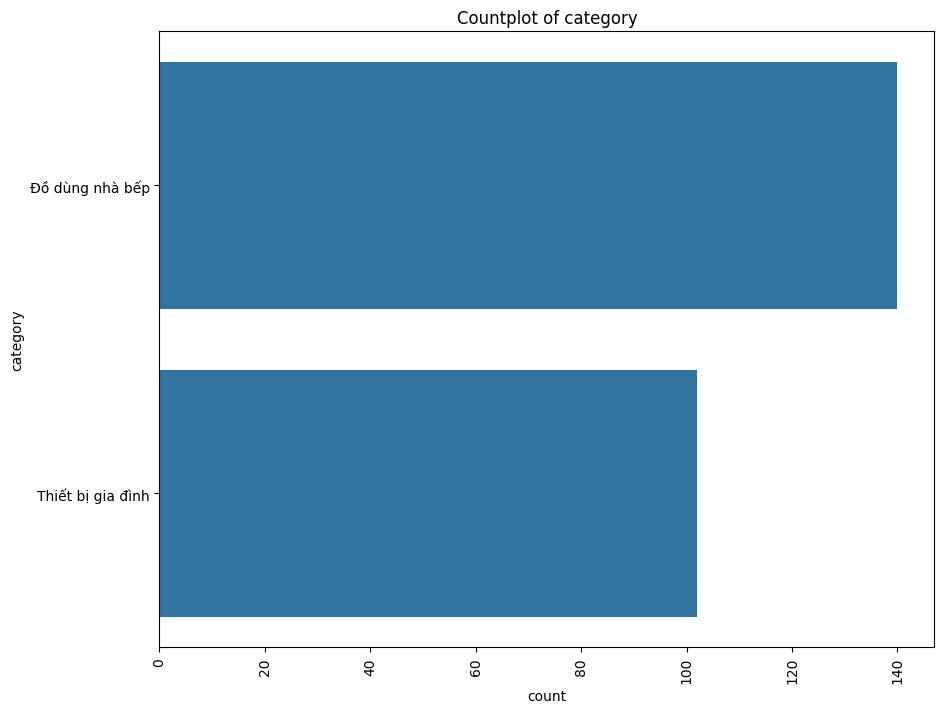

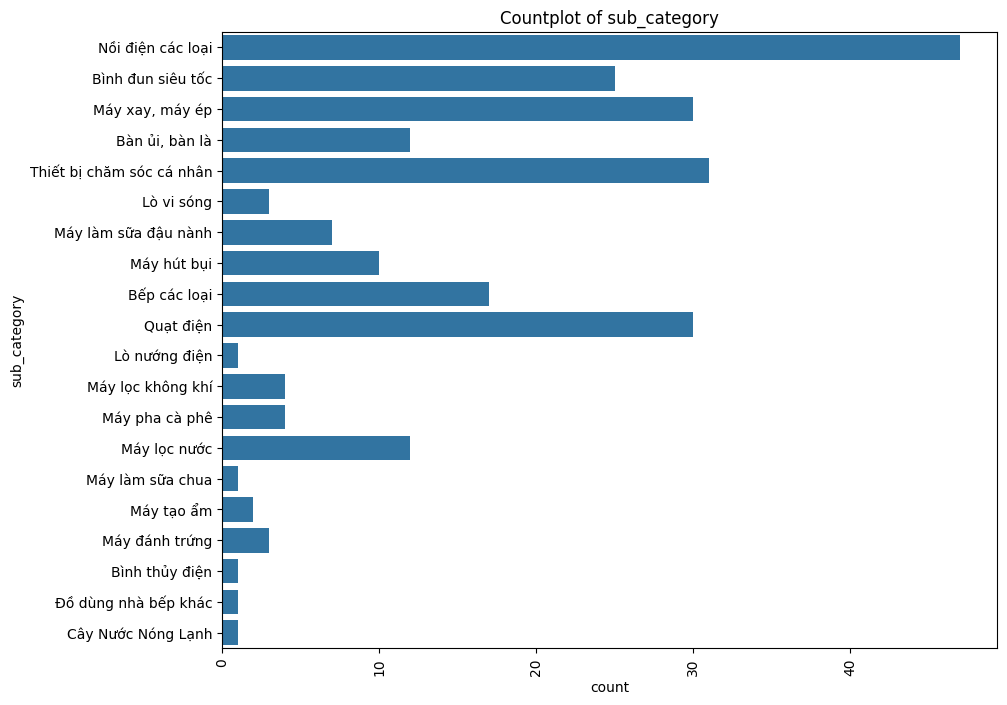

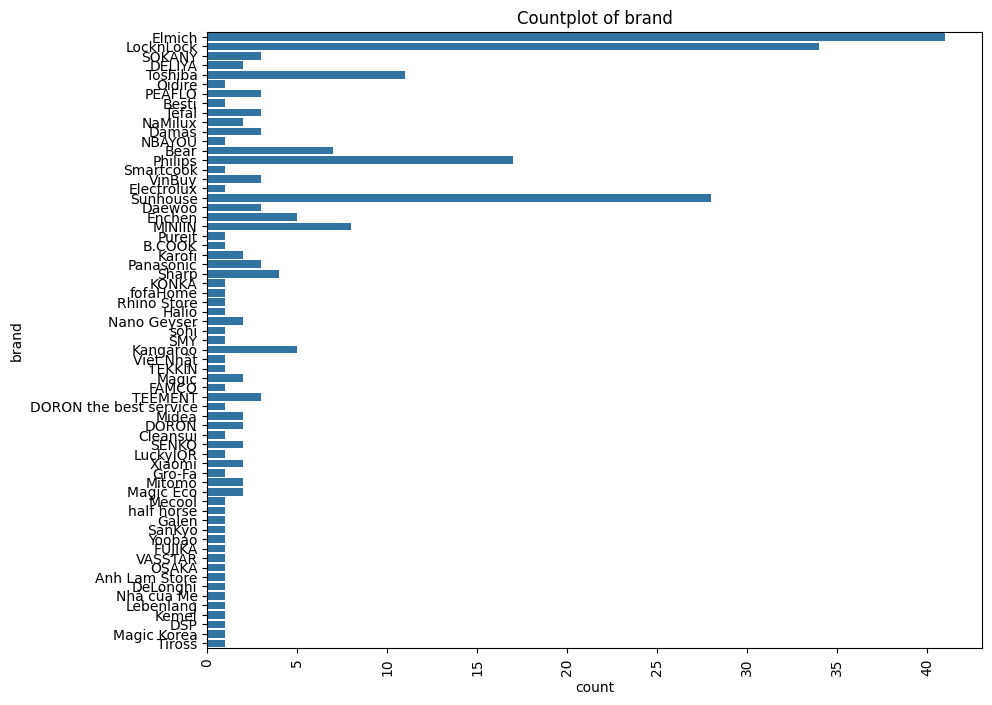

In [25]:
for col in ['category', 'sub_category', 'brand']:
    countplot(df,col)

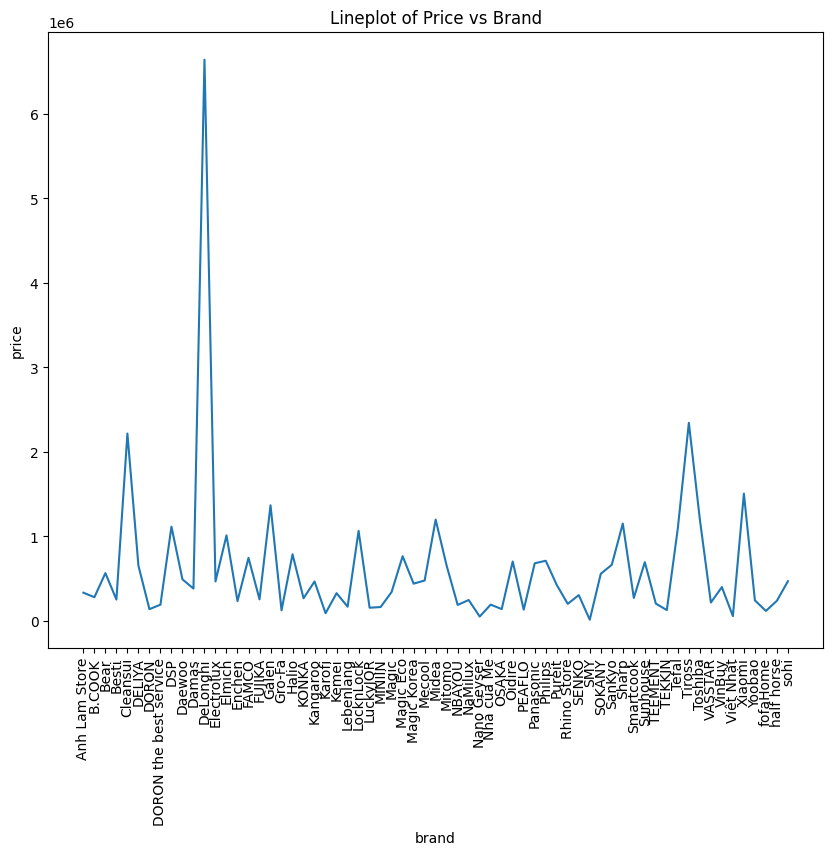

In [29]:
df_brand_price = df.groupby('brand')['price'].mean().reset_index()
plt.figure(figsize=(10, 8))
sns.lineplot(data=df_brand_price, x='brand', y='price')
plt.title('Lineplot of Price vs Brand')
plt.xticks(rotation=90)
plt.show()

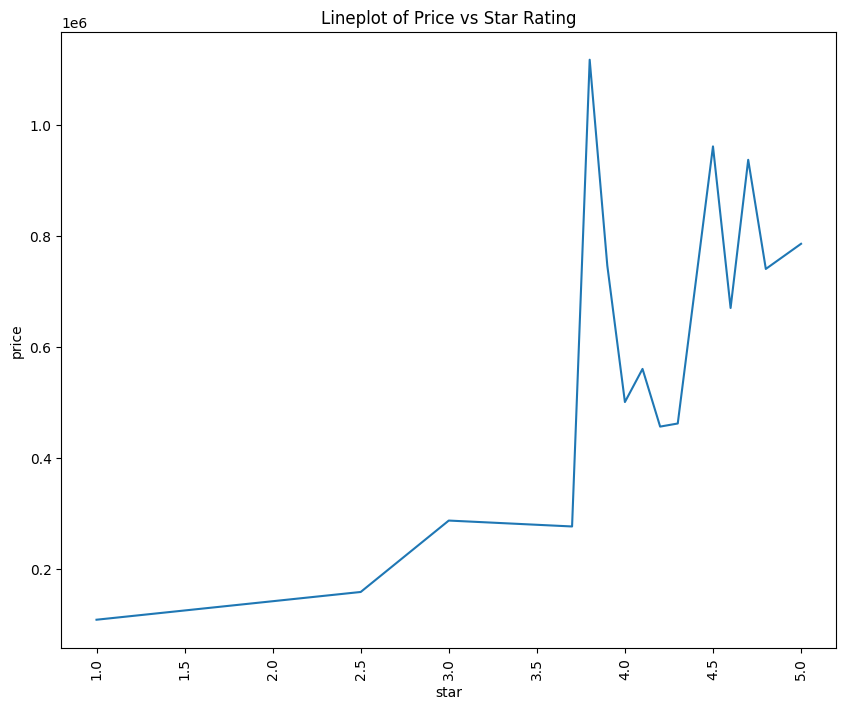

In [30]:
df_star_price = df.groupby('star')['price'].mean().reset_index()
plt.figure(figsize=(10, 8))
sns.lineplot(data=df_star_price, x='star', y='price')
plt.title('Lineplot of Price vs Star Rating')
plt.xticks(rotation=90)
plt.show()

/var/folders/nq/2kwnsz3s0_n7jq2trb91l5_40000gn/T/ipykernel_68907/3601337388.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped = df.groupby('price_group')['sold'].mean().reset_index().sort_values(by='sold', ascending=False)


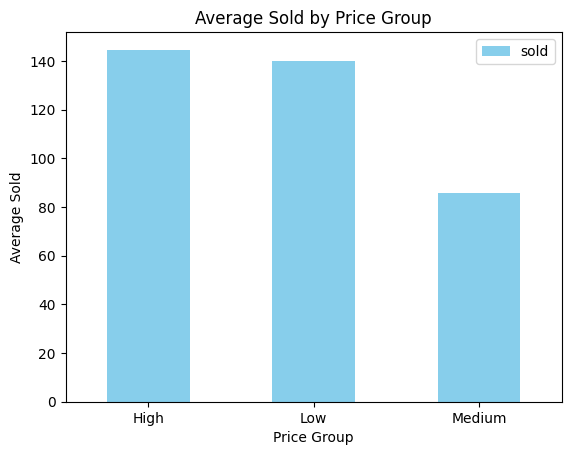

In [32]:
df['price_group'] = pd.qcut(df['price'], q=3, labels=['Low', 'Medium', 'High'])
grouped = df.groupby('price_group')['sold'].mean().reset_index().sort_values(by='sold', ascending=False)
grouped.plot(kind='bar', x='price_group', y='sold', color='skyblue')
plt.title('Average Sold by Price Group')
plt.xlabel('Price Group')
plt.ylabel('Average Sold')
plt.xticks(rotation=0)
plt.show()

In [33]:
#create performance 
df['performance'] = df['sold'] * df['star']


In [34]:
top_perf_products = df.sort_values(by='performance', ascending=False).head(10)
print(top_perf_products[['title', 'category', 'brand', 'price', 'sold', 'star', 'performance']])


                                                 title           category  \
36   Tông Đơ Cắt Tóc Chuyên Nghiệp Không Dây DAMAS ...  Thiết bị gia đình   
90   Nồi Lẩu Điện Đa Năng Mini Ca Nấu Mì, Cơm Đa Nă...    Đồ dùng nhà bếp   
0    Nồi áp suất Elmich PCE-1805 dung tích 2.5L - H...    Đồ dùng nhà bếp   
16   Nồi áp suất Elmich PCE-1805 dung tích 2.5L - H...    Đồ dùng nhà bếp   
164  Nồi cơm điện Locknlock EJR346BLK (Giữ ấm 24h -...    Đồ dùng nhà bếp   
181  Ca nấu mì Daewoo DEN-M550 (0.7L) - Hàng chính ...    Đồ dùng nhà bếp   
96   Máy xay sinh tố cầm tay Philips HR2537 (650W) ...    Đồ dùng nhà bếp   
64   Máy xay thịt 2 lưỡi dao kép Sunhouse SHD5403...    Đồ dùng nhà bếp   
177  Ấm Siêu Tốc Sunhouse SHD1306 (1.7 Lít) - Hàn...    Đồ dùng nhà bếp   
173  Máy cạo râu khô và ướt Philips S1103/02 - Hàng...  Thiết bị gia đình   

         brand      price  sold  star  performance  
36       Damas   282940.0   946   4.8       4540.8  
90      MINIIN    85000.0   986   4.6       45

In [35]:
# Theo category
cat_perf = df.groupby('category')['performance'].mean().sort_values(ascending=False)
print(cat_perf)


category
Đồ dùng nhà bếp      680.356429
Thiết bị gia đình    434.161765
Name: performance, dtype: float64


In [37]:
# Theo sub category
subcat_perf = df.groupby('sub_category')['performance'].mean().sort_values(ascending=False)
print(subcat_perf)

sub_category
Máy làm sữa đậu nành         1071.114286
Nồi điện các loại             928.625532
Máy xay, máy ép               708.406667
Bình thủy điện                666.900000
Máy pha cà phê                662.475000
Thiết bị chăm sóc cá nhân     651.612903
Bếp các loại                  556.788235
Bàn ủi, bàn là                538.141667
Máy lọc nước                  460.225000
Bình đun siêu tốc             350.096000
Máy lọc không khí             278.150000
Quạt điện                     277.870000
Máy hút bụi                   238.280000
Máy đánh trứng                226.166667
Lò vi sóng                    167.200000
Máy tạo ẩm                    130.000000
Đồ dùng nhà bếp khác           75.000000
Máy làm sữa chua               36.000000
Lò nướng điện                  28.800000
Cây Nước Nóng Lạnh             12.600000
Name: performance, dtype: float64


In [38]:
# Theo brand
brand_perf = df.groupby('brand')['performance'].mean().sort_values(ascending=False)
print(brand_perf)

brand
FUJIKA         1603.900000
Damas          1533.166667
Daewoo         1504.666667
Tiross         1300.500000
Karofi         1264.700000
                  ...     
Pureit            4.800000
Electrolux        4.700000
B.COOK            4.600000
Magic Korea       4.600000
OSAKA             4.200000
Name: performance, Length: 65, dtype: float64


In [39]:
df.query('star >= 4.5 and sold < 50').sort_values(by='performance', ascending=True)


,title,url,img_url,price,category,sub_category,brand,description,star,star_reviewers,sold,price_group,performance
104,Quạt Treo Tường Toshiba F-WSA20(H)VN (55W) - X...,https://tiki.vn/quat-treo-tuong-toshiba-f-wsa2...,https://salt.tikicdn.com/cache/750x750/ts/prod...,1012000.0,Thiết bị gia đình,Quạt điện,Toshiba,Thiết kế nhỏ gọn\nQuạt Treo Tường Toshiba F-WS...,4.5,382,1,High,4.5
43,Máy Sấy Tóc Cao Cấp Kiểu Dáng Sang Trọng Tinh ...,https://tiki.vn/may-say-toc-cao-cap-kieu-dang-...,https://salt.tikicdn.com/cache/750x750/ts/prod...,227950.0,Thiết bị gia đình,Thiết bị chăm sóc cá nhân,VinBuy,Kiểu Dáng Sang Trọng Tinh Tế Công Suất LớnChuy...,4.6,463,1,Low,4.6
97,Nồi điện đa năng phủ chống dính cao cấp - Nồi ...,https://tiki.vn/noi-dien-da-nang-phu-chong-din...,https://salt.tikicdn.com/cache/750x750/ts/prod...,281060.0,Đồ dùng nhà bếp,Nồi điện các loại,B.COOK,Giá sản phẩm trên Tiki đã bao gồm thuế theo lu...,4.6,350,1,Low,4.6
46,Máy Xay Sinh Tố Toshiba MX-60T(H) (600W - 1.5 ...,https://tiki.vn/may-xay-sinh-to-toshiba-mx-60t...,https://salt.tikicdn.com/cache/750x750/ts/prod...,556000.0,Đồ dùng nhà bếp,"Máy xay, máy ép",Toshiba,"Thiết kế hiện đại, trang nhã\nMáy Xay Sinh Tố ...",4.6,533,1,Medium,4.6
263,Máy hấp thực phẩm đa năng 03 tầng Magic Korea ...,https://tiki.vn/may-hap-thuc-pham-da-nang-03-t...,https://salt.tikicdn.com/cache/750x750/ts/prod...,441700.0,Đồ dùng nhà bếp,Nồi điện các loại,Magic Korea,"Thiết kế tiện lợi, dễ dàng điều khiển\nMáy hấp...",4.6,335,1,Medium,4.6
...,...,...,...,...,...,...,...,...,...,...,...,...,...
214,Lõi lọc thô PPC Philips AUT706 (cho AUT2015 và...,https://tiki.vn/loi-loc-tho-ppc-philips-aut706...,https://salt.tikicdn.com/cache/750x750/ts/prod...,860000.0,Thiết bị gia đình,Máy lọc nước,Philips,- Tuổi thọ lọc: PPC 6000L (hoặc lên đến 1 năm)...,5.0,5,38,High,190.0
9,Lò vi sóng Toshiba MWP-MM20P(WH) - Dung tích 2...,https://tiki.vn/lo-vi-song-toshiba-mwp-mm20p-w...,https://salt.tikicdn.com/cache/750x750/ts/prod...,1165000.0,Đồ dùng nhà bếp,Lò vi sóng,Toshiba,Loại lò: Lò vi sóng không nướng\nDung tích: 20...,4.8,4,42,High,201.6
29,Máy làm sữa hạt Elmich CBE 3902 (Mới) - Hàng C...,https://tiki.vn/may-lam-sua-hat-elmich-cbe-390...,https://salt.tikicdn.com/cache/750x750/media/c...,1853800.0,Đồ dùng nhà bếp,Máy làm sữa đậu nành,Elmich,"Với thiết kế hiện đại, gọn gàng đầy tinh tế và...",4.6,9,45,High,207.0
20,Máy làm sữa hạt Elmich CBE 3902 (Mới) - Hàng C...,https://tka.tiki.vn/pixel/pixel?data=XcfakVg6o...,https://salt.tikicdn.com/cache/750x750/media/c...,1853800.0,Đồ dùng nhà bếp,Máy làm sữa đậu nành,Elmich,"Với thiết kế hiện đại, gọn gàng đầy tinh tế và...",4.6,9,45,High,207.0


In [40]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 242 entries, 0 to 269
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype   
---  ------          --------------  -----   
 0   title           242 non-null    object  
 1   url             242 non-null    object  
 2   img_url         242 non-null    object  
 3   price           242 non-null    float64 
 4   category        242 non-null    object  
 5   sub_category    242 non-null    object  
 6   brand           242 non-null    object  
 7   description     242 non-null    object  
 8   star            242 non-null    float64 
 9   star_reviewers  242 non-null    int64   
 10  sold            242 non-null    int64   
 11  price_group     242 non-null    category
 12  performance     242 non-null    float64 
dtypes: category(1), float64(3), int64(2), object(7)
memory usage: 24.9+ KB


In [41]:
df.to_csv('finalData.csv')